# Casos COVID-19 confirmados en Mexico 

**Core R y ggplot2**

Se realizara el analisis de los casos confirmados de Covid19 por estados de la Republica Mexicana.
La documentación utilizada proviene del portal del Gobierno de Mexico [aquí](https://coronavirus.gob.mx/datos/).

***Carga de informacion***

In [1]:
library(tidyverse)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [4]:
df<-read.csv("Casos_Diarios_Estado_Nacional_Confirmados_20200715.csv")

***Estructura de la informacion***

In [3]:
str(df)

'data.frame':	33 obs. of  189 variables:
 $ cve_ent    : int  1 2 3 4 7 8 9 5 6 10 ...
 $ poblacion  : int  1434635 3634868 804708 1000617 5730367 3801487 9018645 3218720 785153 1868996 ...
 $ nombre     : Factor w/ 33 levels "AGUASCALIENTES",..: 1 2 3 4 5 6 9 7 8 10 ...
 $ X12.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X13.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X14.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X15.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X16.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X17.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X18.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X19.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X20.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X21.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X22.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X23.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X24.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X25.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X26.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X27.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X28.0

In [13]:
str(covid_mex)

tibble [33 × 189] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ cve_ent   : chr [1:33] "01" "02" "03" "04" ...
 $ poblacion : num [1:33] 1434635 3634868 804708 1000617 5730367 ...
 $ nombre    : chr [1:33] "AGUASCALIENTES" "BAJA CALIFORNIA" "BAJA CALIFORNIA SUR" "CAMPECHE" ...
 $ 12-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 13-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 14-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 15-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 16-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 17-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 18-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 19-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 20-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 21-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 22-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 23-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 24-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 25-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 26-01-2020: num [1:33]

Pasamos la base a _long format_

In [5]:
df_long<-df %>%
    pivot_longer(cols=starts_with("X"),
                 names_to="fecha",
                 values_to="casos")

In [6]:
head(df_long)

cve_ent,poblacion,nombre,fecha,casos
<int>,<int>,<fct>,<chr>,<int>
1,1434635,AGUASCALIENTES,X12.01.2020,0
1,1434635,AGUASCALIENTES,X13.01.2020,0
1,1434635,AGUASCALIENTES,X14.01.2020,0
1,1434635,AGUASCALIENTES,X15.01.2020,0
1,1434635,AGUASCALIENTES,X16.01.2020,0
1,1434635,AGUASCALIENTES,X17.01.2020,0


Pasamos la columna de fecha a formato de fecha en R

In [7]:
df_long$fecha<- df_long$fecha %>%
                    str_remove("X") %>%
                    dmy()

In [8]:
df_long<-rename(df_long, estado=nombre)

In [9]:
str(df_long)

tibble [6,138 × 5] (S3: tbl_df/tbl/data.frame)
 $ cve_ent  : int [1:6138] 1 1 1 1 1 1 1 1 1 1 ...
 $ poblacion: int [1:6138] 1434635 1434635 1434635 1434635 1434635 1434635 1434635 1434635 1434635 1434635 ...
 $ estado   : Factor w/ 33 levels "AGUASCALIENTES",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ fecha    : Date[1:6138], format: "2020-01-12" "2020-01-13" ...
 $ casos    : int [1:6138] 0 0 0 0 0 0 0 0 0 0 ...


**Definicion de fechas de corte para evaluar la efectividad del confinamiento**

Se considera como fecha de inicio de confinamiento nacional el 30 de Mayo de 2020.

In [17]:
confinamiento<-"2020-05-30"

In [29]:
df_long$conf<-df_long$fecha<confinamiento
df_long$conf[df_long$conf==TRUE]<-'InicioPandemia'
df_long$conf[df_long$conf==FALSE]<-'Confinamiento'

Se separan las cifras totales para el analisis por estado

In [30]:
df_long_estados<-subset(df_long,estado!='Nacional')

Resultados de confirmados por etapa de confinamiento

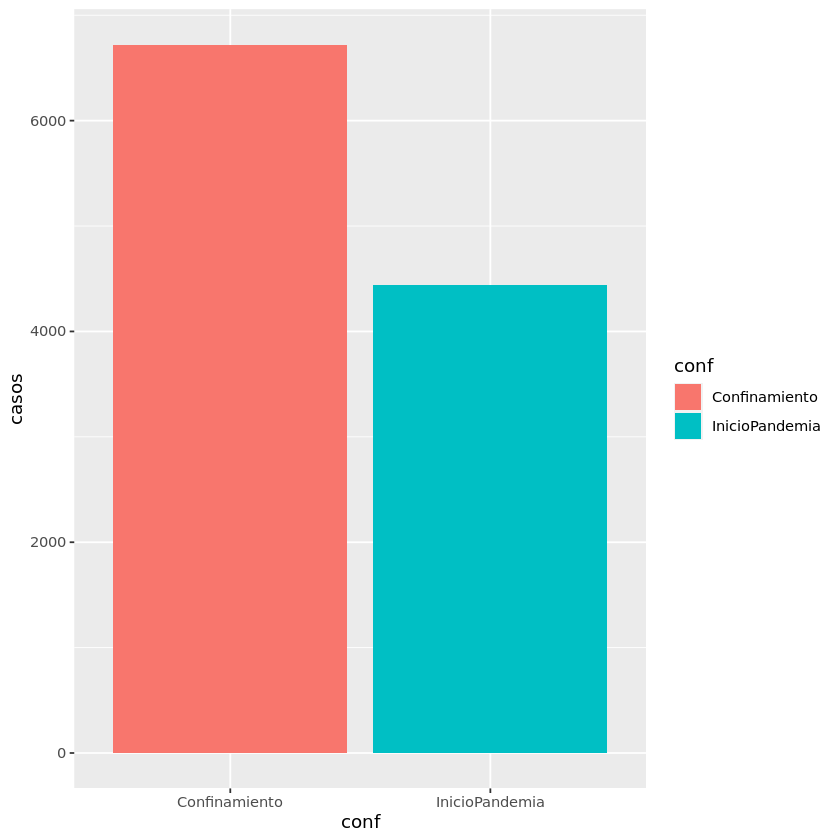

In [31]:
ggplot(subset(df_long,estado=='Nacional'),aes(fill=conf,y=casos,x=conf)) +
  geom_bar(position="dodge",stat="identity")

Se puede observar que existe un numero mayor de confirmados por covid-19 durante la etapa de confinamiento que durante el inicio de la pandemia.

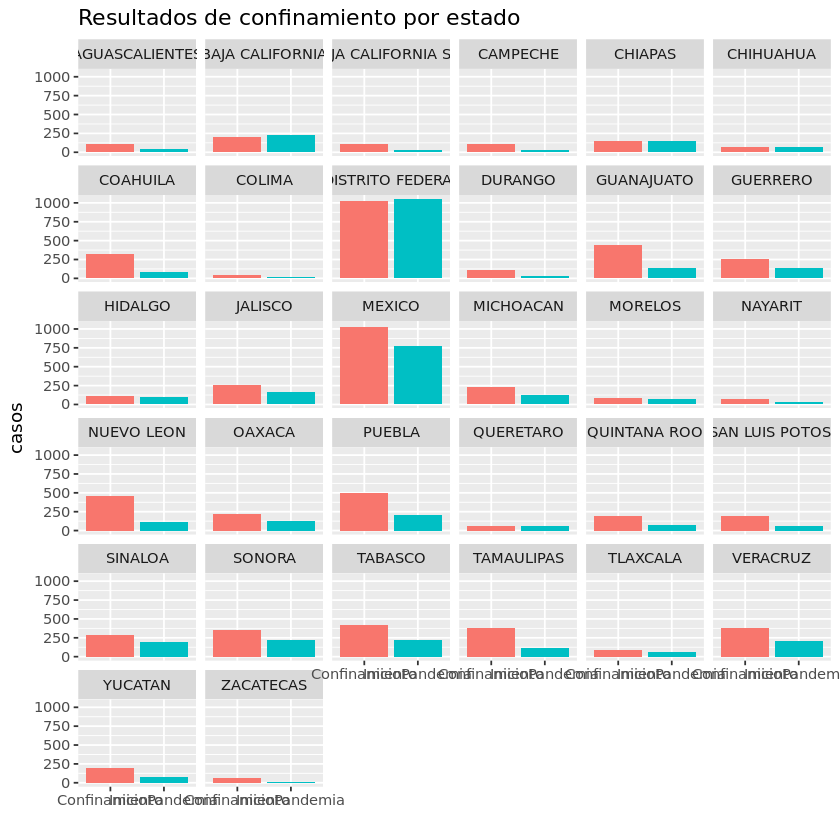

In [32]:
ggplot(df_long_estados,aes(fill=conf,y=casos,x=conf)) +
  geom_bar(position="dodge",stat="identity") +
  ggtitle("Resultados de confinamiento por estado") +
  facet_wrap(~estado)+
  theme(legend.position="none")+
  xlab("")

Los unicos estados que presentan una disminucion de casos respecto a los dos periodos son: Chihuahua, Baja California y Morelos; mientras que los 29 estados tinene aumento.

In [33]:
conf_est<-df_long_estados  %>%
  group_by(estado,conf) %>%
  summarise(casos=sum(casos,na.rm=TRUE))%>%
  spread(conf,casos)

`summarise()` regrouping output by 'estado' (override with `.groups` argument)



In [36]:
conf_est$delta<-conf_est$Confinamiento-conf_est$InicioPandemia

In [38]:
conf_est[order(conf_est$delta),]

estado,Confinamiento,InicioPandemia,delta
<fct>,<int>,<int>,<int>
CHIHUAHUA,1771,2321,-550
BAJA CALIFORNIA,5369,5878,-509
MORELOS,1663,1793,-130
COLIMA,817,163,654
QUERETARO,1670,997,673
ZACATECAS,1205,311,894
HIDALGO,3104,1931,1173
CHIAPAS,3254,2054,1200
TLAXCALA,2363,1136,1227


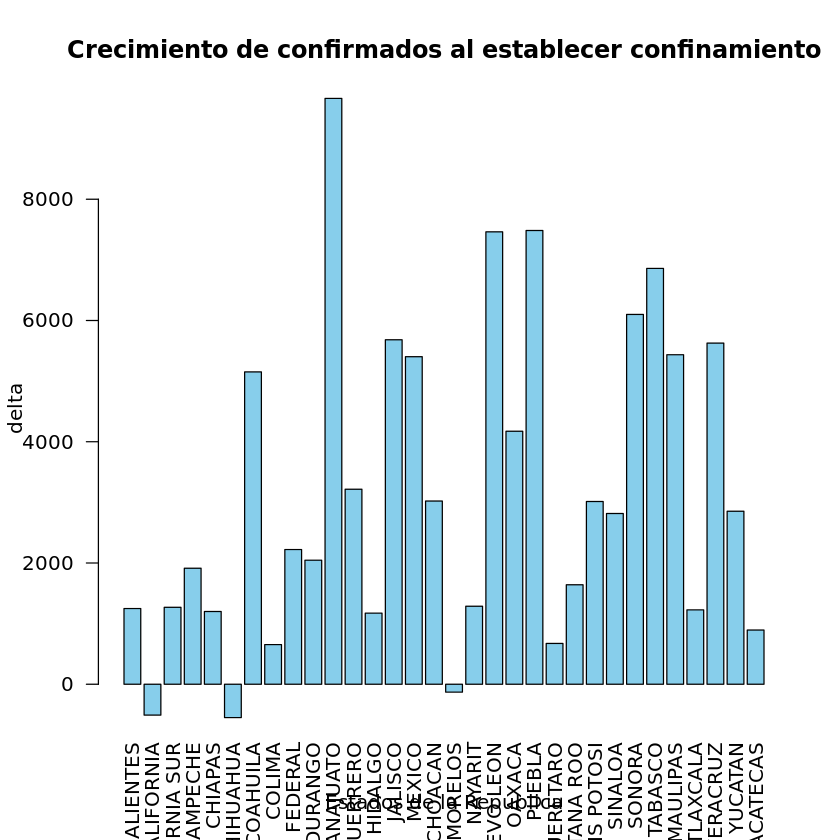

In [40]:
barplot(conf_est$delta,
        names=conf_est$estado,
        las=2,
        main='Crecimiento de confirmados al establecer confinamiento',
        xlab="Estados de la Republica",
        ylab="delta",
        col="skyblue")

In [41]:
conf_est_por<-df_long_estados  %>%
  group_by(estado) %>%
  summarise(casos=sum(casos,na.rm=TRUE),poblacion=max(poblacion))

`summarise()` ungrouping output (override with `.groups` argument)



In [42]:
conf_est_por$por<-100*conf_est_por$casos/conf_est_por$poblacion

In [45]:
plot_por<-ggplot(conf_est_por,aes(x=poblacion,y=por))+
  geom_point(size=6)

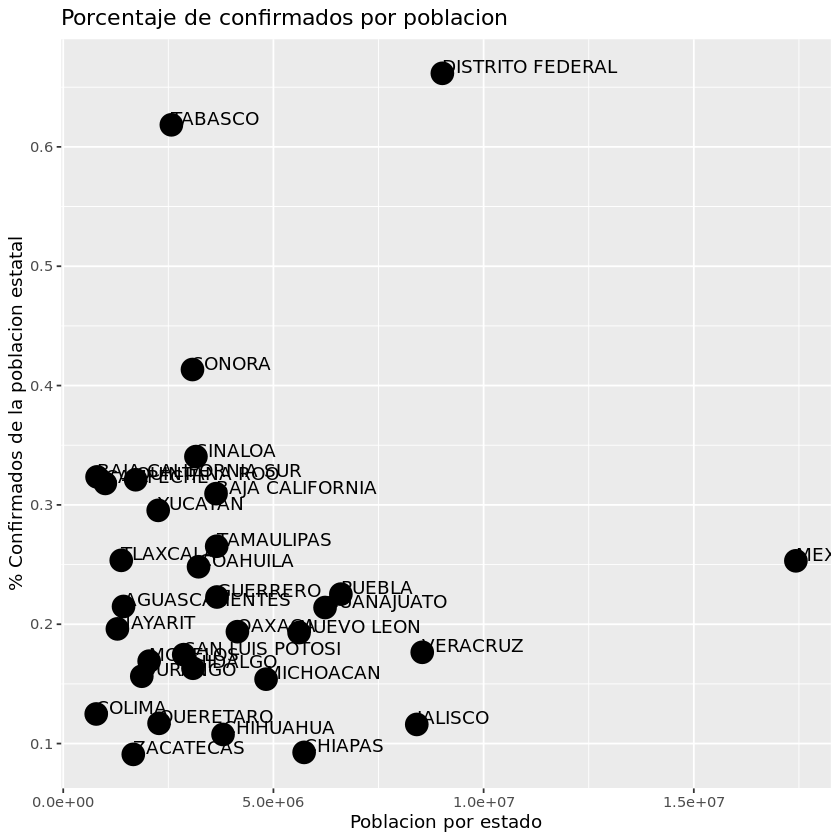

In [46]:
print(plot_por + labs( title= "Porcentaje de confirmados por poblacion", y="% Confirmados de la poblacion estatal", x = "Poblacion por estado")+geom_text(aes(label=estado),hjust=0,vjust=0))

Es importante hacer notar que al realizar los analisis en terminos relativos respecto a la poblacion total del estado, podemos notar que existen estados con porcentaje de casos confirmados alrededor entre 0.65 y 0.4% de su poblacion. Mientras que la inmensa mayoria se encuentra entre un 0.35% y 0.1%.

***Analisis de sensibilidad via regresion lineal***

In [47]:
acum_dia<-df_long_estados  %>%
  group_by(conf,fecha) %>%
  summarise(casos=sum(casos,na.rm=TRUE))

`summarise()` regrouping output by 'conf' (override with `.groups` argument)



`geom_smooth()` using formula 'y ~ x'



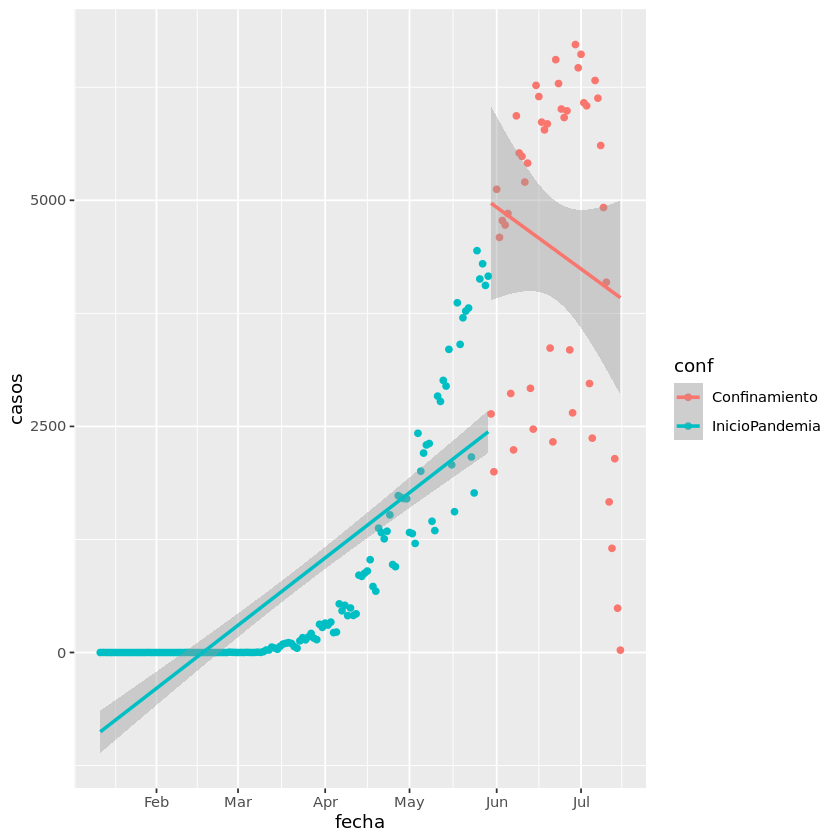

In [48]:
ggplot(acum_dia, aes(fecha,casos,group=conf,col=conf)) + 
  geom_point() + geom_smooth(method=lm)

Como lo mencionamos anteriormente, el periodo de confinamiento tienen mas casos totales que durante el inicio de la pandemia. No obstante, mediante el analisis de regresion simple se muestra que la pendiente de los dos modelos es diferente. Mientras que para la primera fase es positiva, para el segundo momento es menor y negativa. Lo que podria indicarnos que existe un cambio en la tendencia de confirmados por Covid-19. Es muy importante seguir monitoreando este desempeño para verificar que este comportamiento sea sostenido en el tiempo.